# Analýza EMG signálu

Tento notebook analyzuje zadaný elektromyografický (EMG) signál s cílem identifikovat změny v jeho intenzitě a charakteru.

### Postup zpracování signálu:
- Výpočet iEMG (kumulativní součet absolutní hodnoty signálu)
- Klouzavé okno pro časovou analýzu
- Derivace signálu
- Vizuální zvýraznění fází změn pomocí barvení grafu

### Použité knihovny:
NumPy, Matplotlib

# Analýza prvního kanálu

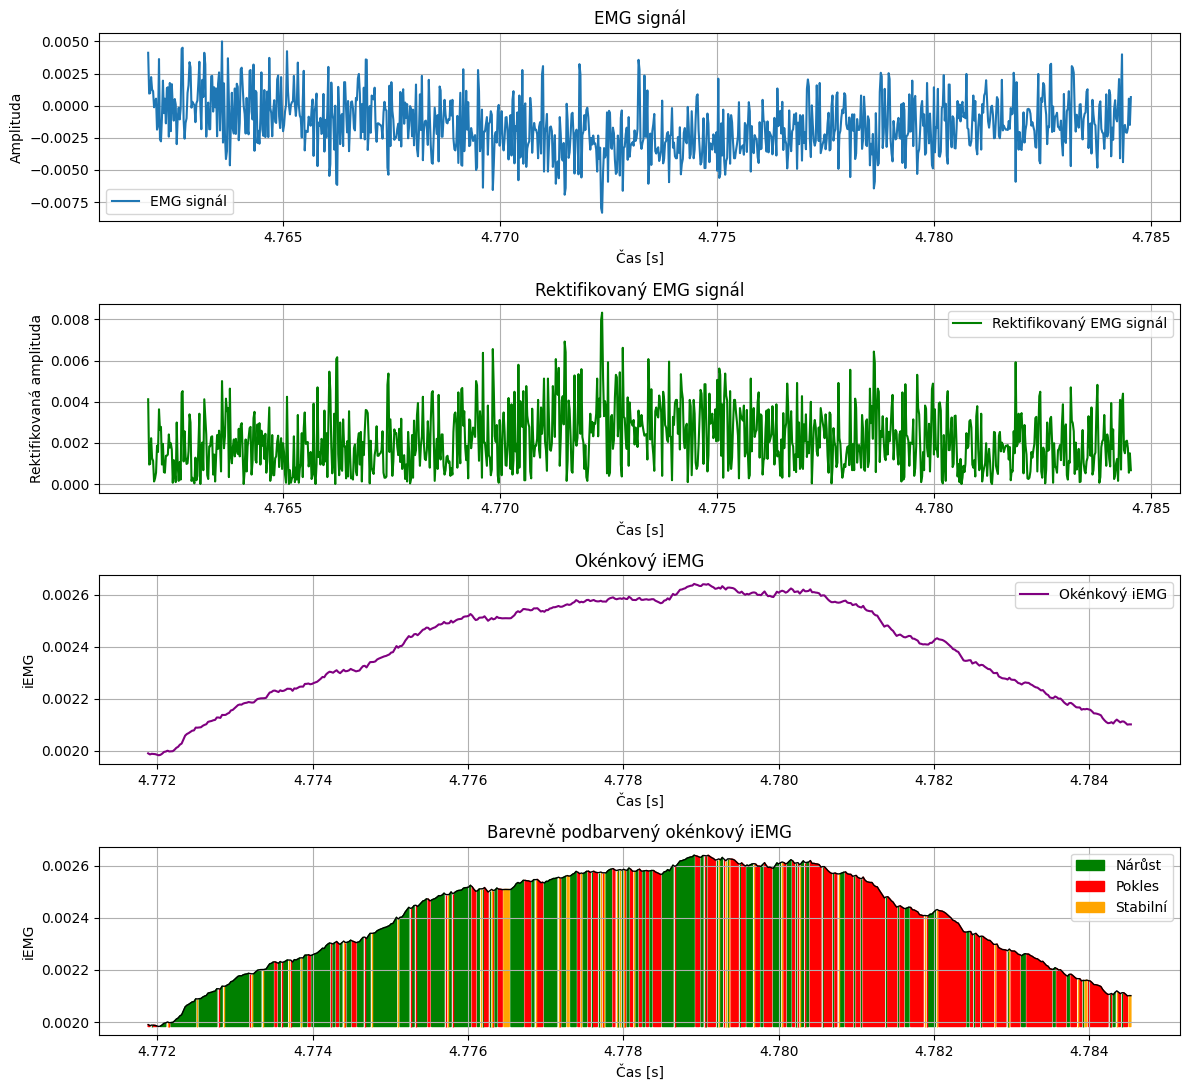

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Načtení dat
data = np.loadtxt("EMG.txt")
time = data[:, 0]
emg_signal = data[:, 1]

# Rectifikace
rectified = np.abs(emg_signal)

# Výpočet dt
dt = np.mean(np.diff(time))

# Okénkový iEMG
window_duration = 0.01
window_size = int(window_duration / dt)
window_iemg = np.convolve(rectified, np.ones(window_size)/window_size, mode='valid')
time_window = time[window_size - 1:]

# Derivace
derivative = np.gradient(window_iemg, dt)

# Barevné masky pro vyplnění
threshold = 0.02
mask_rise = derivative > threshold
mask_fall = derivative < -threshold
mask_stable = (~mask_rise) & (~mask_fall)
baseline = np.min(window_iemg)

# Grafy
plt.figure(figsize=(12, 11))
plt.subplot(4, 1, 1)
plt.plot(time, emg_signal, label='EMG signál')
plt.title('EMG signál')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(time, rectified, color='green', label='Rektifikovaný EMG signál')
plt.title('Rektifikovaný EMG signál')
plt.xlabel('Čas [s]')
plt.ylabel('Rektifikovaná amplituda')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(time_window, window_iemg, color='purple', label='Okénkový iEMG')
plt.title('Okénkový iEMG')
plt.xlabel('Čas [s]')
plt.ylabel('iEMG')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(time_window, window_iemg, color='black', linewidth=1)
plt.title('Barevně podbarvený okénkový iEMG')
plt.xlabel('Čas [s]')
plt.ylabel('iEMG')
plt.grid()
plt.fill_between(time_window, baseline, window_iemg, where=mask_rise, color='green', label='Nárůst')
plt.fill_between(time_window, baseline, window_iemg, where=mask_fall, color='red', label='Pokles')
plt.fill_between(time_window, baseline, window_iemg, where=mask_stable, color='orange', label='Stabilní')
plt.legend()

plt.tight_layout()
plt.show()


# Analýza druhého kanálu

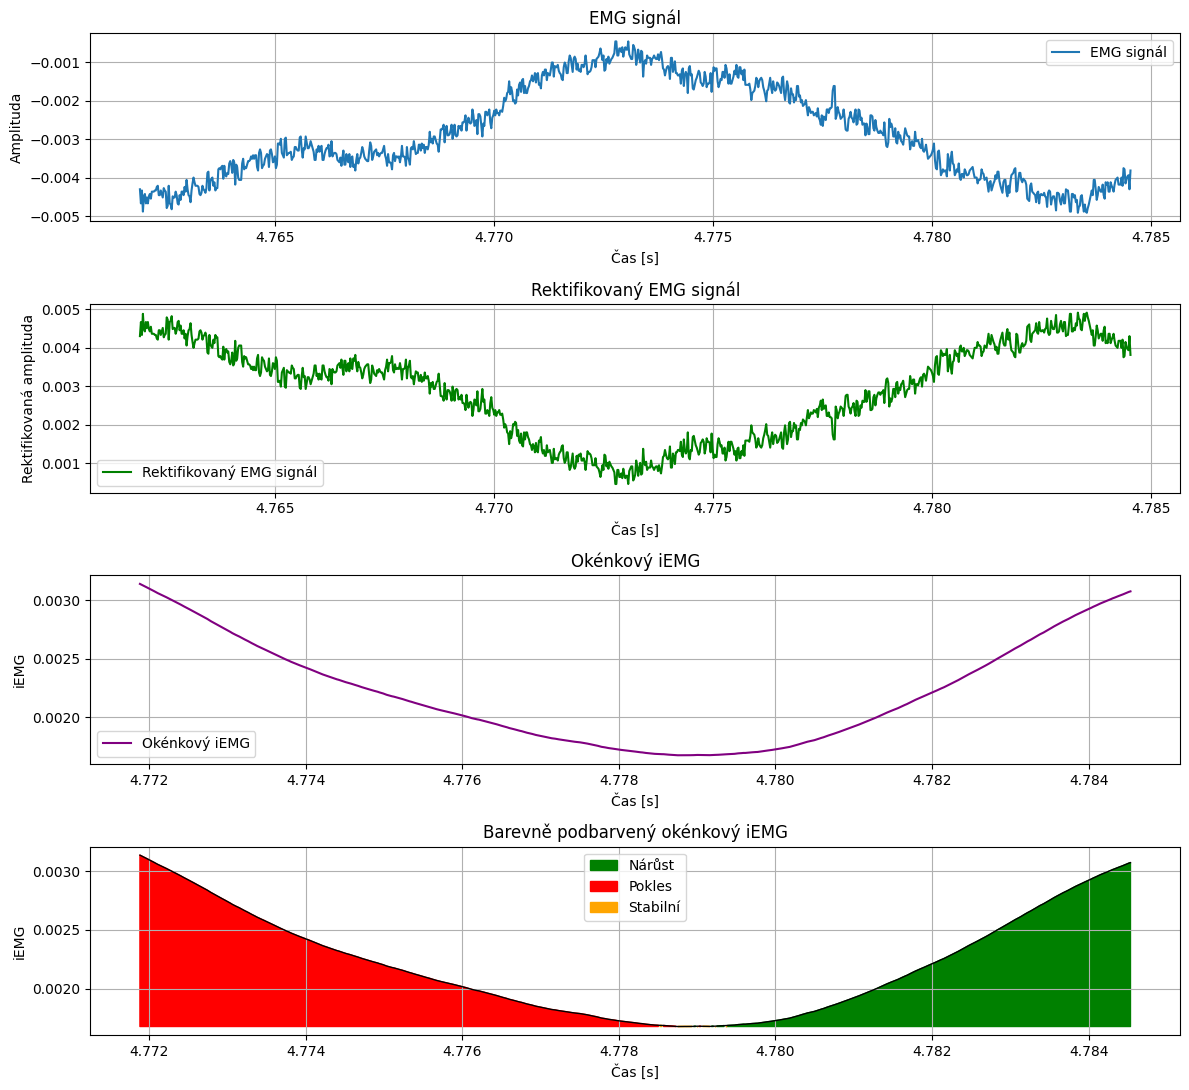

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Načtení dat
data = np.loadtxt("EMG.txt")
time = data[:, 0]
emg_signal = data[:, 2]

# Rectifikace
rectified = np.abs(emg_signal)

# Výpočet dt
dt = np.mean(np.diff(time))

# Okénkový iEMG
window_duration = 0.01
window_size = int(window_duration / dt)
window_iemg = np.convolve(rectified, np.ones(window_size)/window_size, mode='valid')
time_window = time[window_size - 1:]

# Derivace
derivative = np.gradient(window_iemg, dt)

# Barevné masky pro vyplnění
threshold = 0.02
mask_rise = derivative > threshold
mask_fall = derivative < -threshold
mask_stable = (~mask_rise) & (~mask_fall)
baseline = np.min(window_iemg)

# Grafy
plt.figure(figsize=(12, 11))
plt.subplot(4, 1, 1)
plt.plot(time, emg_signal, label='EMG signál')
plt.title('EMG signál')
plt.ylabel('Amplituda')
plt.xlabel('Čas [s]')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(time, rectified, color='green', label='Rektifikovaný EMG signál')
plt.title('Rektifikovaný EMG signál')
plt.xlabel('Čas [s]')
plt.ylabel('Rektifikovaná amplituda')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(time_window, window_iemg, color='purple', label='Okénkový iEMG')
plt.title('Okénkový iEMG')
plt.xlabel('Čas [s]')
plt.ylabel('iEMG')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(time_window, window_iemg, color='black', linewidth=1)
plt.title('Barevně podbarvený okénkový iEMG')
plt.xlabel('Čas [s]')
plt.ylabel('iEMG')
plt.grid()
plt.fill_between(time_window, baseline, window_iemg, where=mask_rise, color='green', label='Nárůst')
plt.fill_between(time_window, baseline, window_iemg, where=mask_fall, color='red', label='Pokles')
plt.fill_between(time_window, baseline, window_iemg, where=mask_stable, color='orange', label='Stabilní')
plt.legend()

plt.tight_layout()
plt.show()
